#  ALL H&M STORES WORLDWIDE

**GOALS**

The goal of this project is to analyze the global distribution of H&M stores. This analysis aims to identify countries and cities with the highest store concentration and to examine the proportion of each store class in order to understand H&M’s geographic presence and retail format strategy.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HM_all_stores.csv")


In [45]:
df = pd.read_csv("HM_all_stores.csv")
df.head()
df.info()
df.describe(include="object")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   storeCode       4292 non-null   object 
 1   storeClass      4289 non-null   object 
 2   name            4290 non-null   object 
 3   phone           4140 non-null   object 
 4   city            4292 non-null   object 
 5   country         4292 non-null   object 
 6   countryCode     4292 non-null   object 
 7   longitude       4292 non-null   float64
 8   latitude        4292 non-null   float64
 9   timeZoneIndex   4289 non-null   float64
 10  Mon_open_hours  4258 non-null   object 
 11  Tue_open_hours  4258 non-null   object 
 12  Wed_open_hours  4258 non-null   object 
 13  Thu_open_hours  4258 non-null   object 
 14  Fri_open_hours  4258 non-null   object 
 15  Sat_open_hours  4258 non-null   object 
 16  Sun_open_hours  3148 non-null   object 
 17  streetName1     4292 non-null   o

,storeCode,storeClass,name,phone,city,country,countryCode,Mon_open_hours,Tue_open_hours,Wed_open_hours,Thu_open_hours,Fri_open_hours,Sat_open_hours,Sun_open_hours,streetName1,streetName2,state,address_string
count,4292,4289,4290,4140,4292,4292,4292,4258,4258,4258,4258,4258,4258,3148,4292,1827,2431,4292
unique,4290,4,4192,1147,2522,74,74,89,86,86,88,105,109,93,4248,1811,334,4281
top,PR0001,Red,Wanda Plaza,+1-855-466-7467,Moscow,USA,US,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,10:00-22:00,ТЦ Парк Хаус,High Street,California,The Mall of San Juan;1000 Mall of San Juan Bou...
freq,2,2356,25,512,35,532,532,881,881,881,842,766,791,780,3,3,83,2


**Conclusion**

For More Info About All H&M Store of All Column in Dataset AS Load





In [46]:
# Calculate total number of stores in the dataset
total_store = len(df)

# Count unique countries where stores are located
total_country = df['country'].nunique()

# Count unique cities where stores are located
total_city = df['city'].nunique()

# Display summary statistics
print(f"Total Store: {total_store}")
print(f"Total Country: {total_country}")
print(f"Total City: {total_city}")



Total Store: 4292
Total Country: 74
Total City: 2522


**Conclusion**

Find Out Total All H&M Stores by how many Store, Country, and City

In [47]:
# Calculate total stores and total cities per country
country_distribution = (
    df.groupby('country')
      .agg(
          total_stores=('city', 'count'),
          total_cities=('city', 'nunique')
      )
      .reset_index()
)

# Calculate average number of stores per city
country_distribution['avg_store_per_city'] = (
    country_distribution['total_stores'] / country_distribution['total_cities']
)

# Get top 5 countries with the highest average store distribution
top5_avg_distribution = (
    country_distribution
    .sort_values('avg_store_per_city', ascending=False)
    .head(5)
)

top5_avg_distribution



,country,total_stores,total_cities,avg_store_per_city
21,Hong Kong SAR,12,1,12.0
57,Singapore,9,1,9.0
14,Egypt,14,2,7.0
34,Latvia,7,1,7.0
33,Kuwait,13,2,6.5


**Conclusion**

Countries with a higher average number of stores per city indicate stronger market penetration and a more mature retail presence.

**Conclusion**

For count store by country

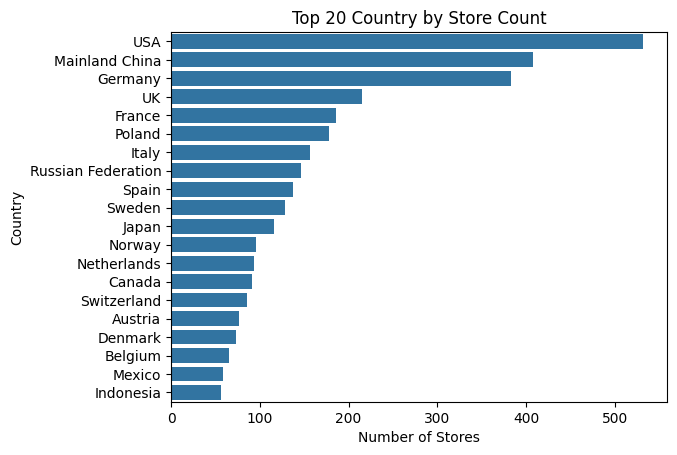

In [48]:
top20_country = store_by_country.head(20)

plt.figure()
sns.barplot(data=top20_country, x='store_count', y='country')
plt.title("Top 20 Country by Store Count")
plt.xlabel("Number of Stores")
plt.ylabel("Country")
plt.show()


**Conlucsion**

Conclusion

The 20 Countries with the Largest H&M Stores in the World

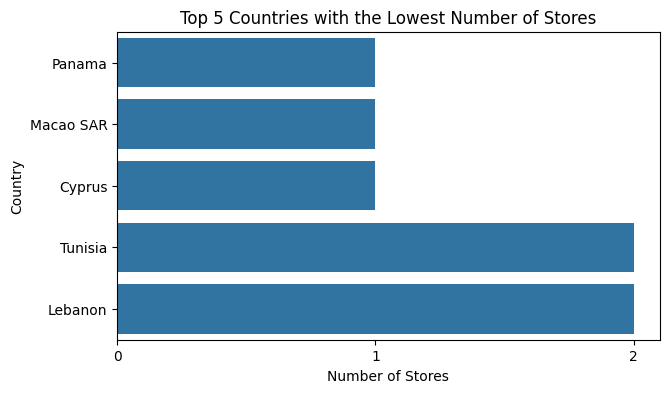

In [49]:
from matplotlib.ticker import MaxNLocator

# Count Total store by country
store_by_country = (
    df['country']
    .value_counts()
    .reset_index()
)

store_by_country.columns = ['country', 'store_count']

# Get 5 Country with low store
bottom5_country = (
    store_by_country
    .sort_values('store_count', ascending=True)
    .head(5)
)

# Plot bar chart
plt.figure(figsize=(7,4))
sns.barplot(
    data=bottom5_country,
    x='store_count',
    y='country'
)

plt.title("Top 5 Countries with the Lowest Number of Stores")
plt.xlabel("Number of Stores")
plt.ylabel("Country")

# Force integer ticks
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()




**Conlucsion**

Conclusion

5 Countries with the Lowest Number of H&M Stores in the World

<function matplotlib.pyplot.show(close=None, block=None)>

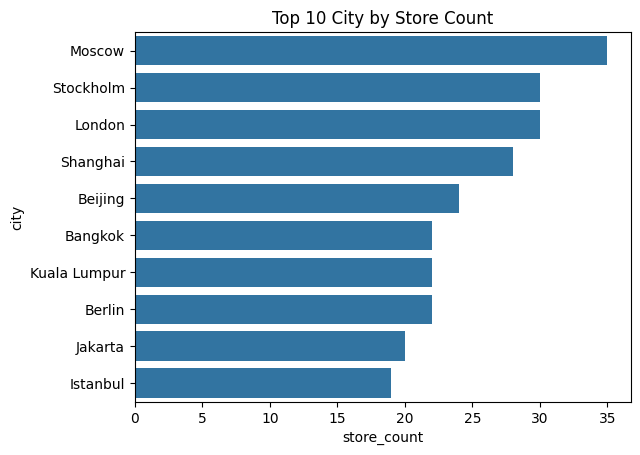

In [50]:
top10_city = df['city'].value_counts().head(10).reset_index()
top10_city.columns = ['city', 'store_count']

plt.figure()
sns.barplot(data=top10_city, x='store_count', y='city')
plt.title("Top 10 City by Store Count")
plt.show

**Conclusion**

The 10 Cities with the Largest H&M Stores in the World

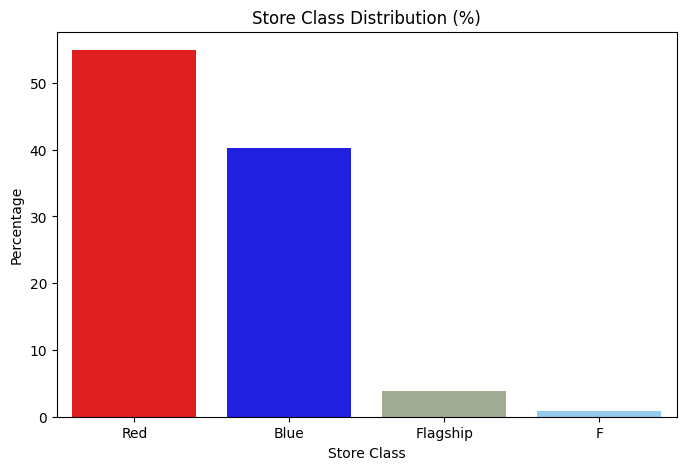

In [51]:
storeclass_dist = (
    df['storeClass']
    .dropna()
    .value_counts(normalize=True)
    .reset_index()
)

storeclass_dist.columns = ['storeClass', 'percentage']
storeclass_dist['percentage'] = storeclass_dist['percentage'] * 100


color_map = {
    'Red': 'red',
    'Blue': 'blue',
    'Flagship': '#9FAF8F',
    'F': 'lightskyblue'
}

plt.figure(figsize=(8,5))
sns.barplot(
    data=storeclass_dist,
    x='storeClass',
    y='percentage',
    hue='storeClass',
    palette=color_map,
    legend=False
)

plt.title("Store Class Distribution (%)")
plt.xlabel("Store Class")
plt.ylabel("Percentage")

plt.show()




**Conclusion**

Classify by Store Class with Percentage and assign a color to each class.

In [52]:
#  Count total store, storeClass based on number of country
storeclass_country = (
    df.groupby(['storeClass', 'country'])
      .size()
      .reset_index(name='store_count')
)

# Ambil negara dengan store terbanyak untuk tiap storeClass
top_country_per_storeclass = (
    storeclass_country
    .loc[storeclass_country.groupby('storeClass')['store_count'].idxmax()]
    .reset_index(drop=True)
)

# Hitung total store global per storeClass
total_storeclass = (
    df.groupby('storeClass')
      .size()
      .reset_index(name='total_store_global')
)

# Join for the result
final_result = top_country_per_storeclass.merge(
    total_storeclass,
    on='storeClass',
    how='left'
)

final_result


,storeClass,country,store_count,total_store_global
0,Blue,USA,211,1729
1,F,Russian Federation,10,36
2,Flagship,USA,25,168
3,Red,USA,296,2356


**Conclusion**

To find out the largest number of stores per class along with the country with the largest number of stores.

In [53]:
# count total city & total store based on number count countries
country_summary = (
    df.groupby('country')
      .agg(
          total_cities=('city', 'nunique'),
          total_stores=('city', 'count')
      )
      .reset_index()
)

#  Get 10 country with many cities
top10_country_by_city = (
    country_summary
    .sort_values('total_cities', ascending=False)
    .head(10)
)

top10_country_by_city



,country,total_cities,total_stores
69,USA,435,532
19,Germany,273,383
68,UK,146,215
39,Mainland China,142,408
17,France,132,186
50,Poland,101,178
28,Italy,101,156
61,Spain,88,137
43,Netherlands,73,93
62,Sweden,71,128


**Conclusion**

Find out the number of stores spread across the largest cities in each country.

### **Visualizing the Data of stores spread across the largest cities in each country.**


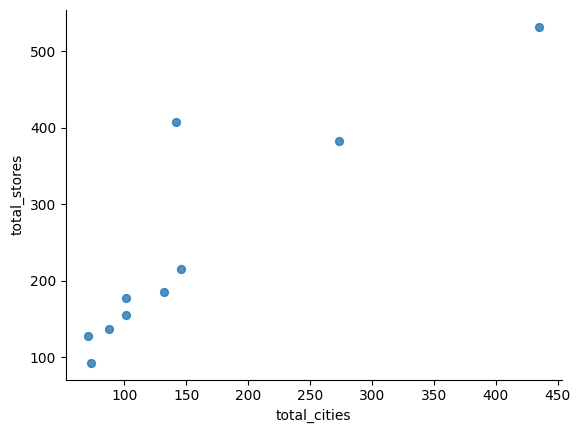

In [54]:
from matplotlib import pyplot as plt
top10_country_by_city.plot(kind='scatter', x='total_cities', y='total_stores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Conclusin**

The scatter plot shows that countries with broader city coverage do not always have a higher number of stores, indicating different market concentration strategies across countries.

# Conclusion

Based on my analysis, H&M stores are highly concentrated in specific countries and major cities, with Red and Blue store classes dominating the overall distribution. Flagship stores account for a smaller share, suggesting a focused strategy on key markets rather than widespread placement. This indicates that H&M prioritizes scalable store formats while maintaining flagship locations for brand positioning.
